In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import f1_score
from numpy import linspace

## Linear Regression


In [105]:
df = pd.read_csv("./datasets/dataset_colesterol.csv")

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [107]:
df.drop("Id", axis=1, inplace=True)
df = pd.get_dummies(df, columns=["Grupo Sanguíneo", "Fumante", "Nível de Atividade"])

In [108]:
df.head(10)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,0,0,1,0,0,1,0,1,0
1,68,105.0,184,236.98,1,0,0,0,1,0,0,0,1
2,25,64.8,180,161.79,0,0,0,1,1,0,1,0,0
3,43,120.2,167,336.24,1,0,0,0,1,0,1,0,0
4,79,88.5,175,226.23,0,1,0,0,1,0,0,1,0
5,68,66.8,170,185.31,0,0,1,0,1,0,0,1,0
6,60,117.3,181,289.33,1,0,0,0,0,1,0,1,0
7,35,86.9,174,216.48,0,0,0,1,0,1,0,0,1
8,62,81.3,166,235.30,0,0,0,1,1,0,0,1,0
9,44,32.7,165,97.79,0,0,1,0,0,1,1,0,0


### Training the model


In [109]:
X = df.drop(columns=["Colesterol"], axis=1)
y = df["Colesterol"]

In [110]:
reg_model = LinearRegression()

In [111]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    reg_model,
    X,
    y,
    train_sizes=linspace(0.1, 0.9, 9),
    scoring="neg_root_mean_squared_error",
    cv=3,
)

In [112]:
train_scores

array([[-6.89846936, -8.75165029, -8.75165029],
       [-7.41399963, -9.44758228, -9.44758228],
       [-7.83969641, -9.07641181, -9.07641181],
       [-8.12622867, -9.01610984, -9.01610984],
       [-8.05175455, -9.1155504 , -9.1155504 ],
       [-7.9850157 , -8.85581488, -8.90398566],
       [-8.1058845 , -8.85090458, -8.75924645],
       [-8.17849767, -8.80295848, -8.75142524],
       [-8.38602953, -8.92266501, -8.76606173]])

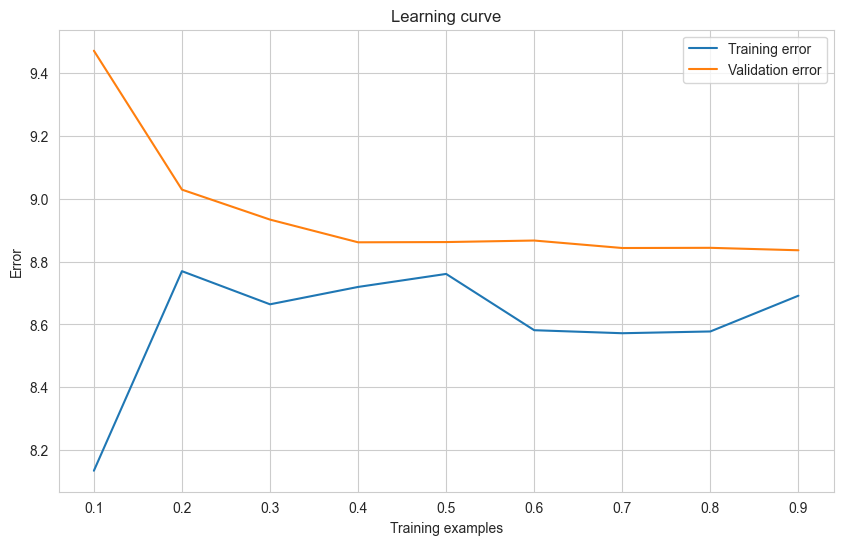

In [113]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(linspace(0.1, 0.9, 9), -train_scores.mean(axis=1), label="Training error")
plt.plot(linspace(0.1, 0.9, 9), -test_scores.mean(axis=1), label="Validation error")
plt.xlabel("Training examples")
plt.ylabel("Error")
plt.title("Learning curve")
plt.legend()
plt.show()

## KNN Classifier


In [114]:
df = pd.read_csv("./datasets/fruit_quality.csv")

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [116]:
df.drop("A_id", axis=1, inplace=True)
df["Quality"] = (df["Quality"] == "good").astype(int)

In [117]:
df.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


### Training the model


In [118]:
X = df.drop("Quality", axis=1)
y = df["Quality"]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=51
)

In [120]:
# Train the model with different k values to find the best value
train_scores = []
test_scores = []

for n_neighbors in range(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_scores.append(f1_score(y_train, y_train_pred))
    test_scores.append(f1_score(y_test, y_test_pred))

    print(
        f"n_neighbors={n_neighbors}, train f1={train_scores[-1]}, test f1={test_scores[-1]}"
    )

n_neighbors=1, train f1=1.0, test f1=0.8740617180984154
n_neighbors=3, train f1=0.9452103216684341, test f1=0.8964941569282137
n_neighbors=5, train f1=0.9262266148958701, test f1=0.8985985160758451
n_neighbors=7, train f1=0.921935711762628, test f1=0.8929460580912864
n_neighbors=9, train f1=0.9186704384724187, test f1=0.8913043478260869
n_neighbors=11, train f1=0.9178130511463845, test f1=0.8887029288702929
n_neighbors=13, train f1=0.9115983026874116, test f1=0.8881469115191987
n_neighbors=15, train f1=0.9133969600565571, test f1=0.890728476821192
n_neighbors=17, train f1=0.9099258212645708, test f1=0.8883333333333333
n_neighbors=19, train f1=0.9115885875308207, test f1=0.885


In [121]:
# Create a dataframe with the scores
scores_df = pd.DataFrame(
    {
        "k": range(1, 20, 2),
        "train_f1": train_scores,
        "test_f1": test_scores,
    }
)
scores_df

,k,train_f1,test_f1
0,1,1.000000,0.874062
1,3,0.945210,0.896494
2,5,0.926227,0.898599
3,7,0.921936,0.892946
4,9,0.918670,0.891304
5,11,0.917813,0.888703
6,13,0.911598,0.888147
7,15,0.913397,0.890728
8,17,0.909926,0.888333
9,19,0.911589,0.885000


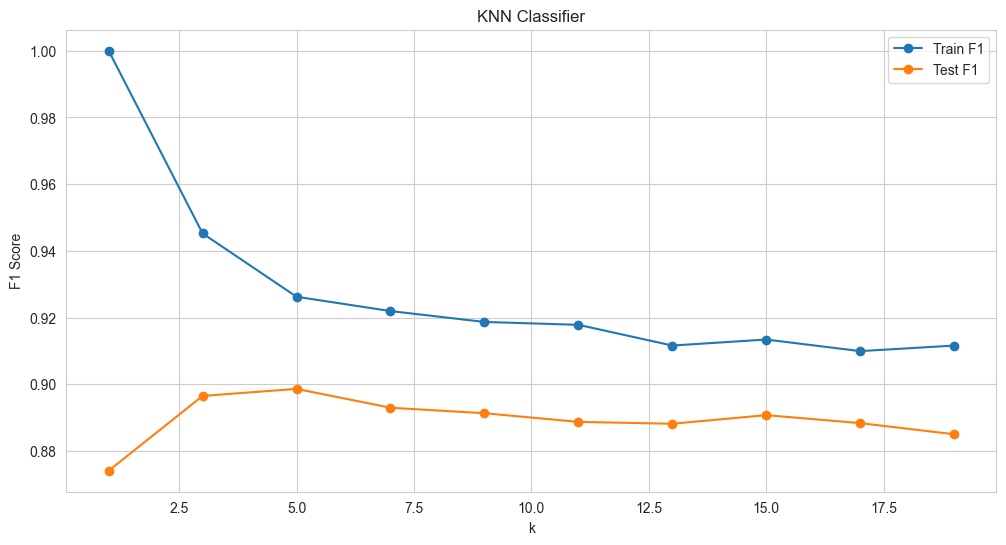

In [122]:
# Plot the scores
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(scores_df["k"], scores_df["train_f1"], marker="o", label="Train F1")
plt.plot(scores_df["k"], scores_df["test_f1"], marker="o", label="Test F1")
plt.xlabel("k")
plt.ylabel("F1 Score")
plt.title("KNN Classifier")
plt.legend()
plt.show()